In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 


In [2]:
#Abrindo os DataFrames
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")



In [3]:
#Checando informações sobre as colunas
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
textID           27481 non-null object
text             27480 non-null object
selected_text    27480 non-null object
sentiment        27481 non-null object
dtypes: object(4)
memory usage: 858.9+ KB


In [4]:
#Verificando os valores nulos
train[train['text'].isna()]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [5]:
#Retirando os valores nulos
train.dropna(inplace = True) 

In [6]:
#Ajeitando a numeração das linhas
train.reset_index(inplace=True) 


In [7]:
train.tail()


,index,textID,text,selected_text,sentiment
27475,27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27476,27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27477,27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27478,27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive
27479,27480,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral


In [8]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27480 entries, 0 to 27479
Data columns (total 5 columns):
index            27480 non-null int64
textID           27480 non-null object
text             27480 non-null object
selected_text    27480 non-null object
sentiment        27480 non-null object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [9]:
train['sentiment'].unique()


array(['neutral', 'negative', 'positive'], dtype=object)

In [10]:
train['sentiment'] = train['sentiment'].astype('category')


In [11]:
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27480 entries, 0 to 27479
Data columns (total 5 columns):
index            27480 non-null int64
textID           27480 non-null object
text             27480 non-null object
selected_text    27480 non-null object
sentiment        27480 non-null category
dtypes: category(1), int64(1), object(3)
memory usage: 885.8+ KB


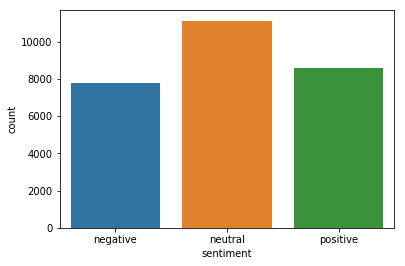

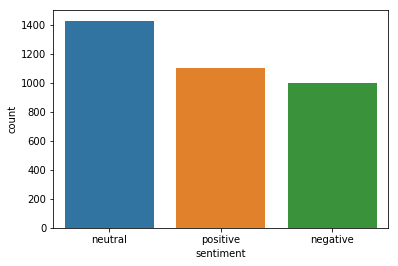

In [12]:
sns.countplot(x='sentiment', data=train)
plt.show()
sns.countplot(x='sentiment', data=test)


In [13]:
#Criando uma coluna com o tamanho de cada texto
train['chars'] = train['text'].apply(len)
train['selected_chars'] = train['selected_text'].apply(len)


Text(0.5, 0.98, 'Distribuição do número de letras por tweet')

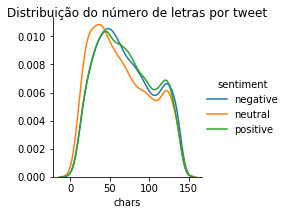

In [14]:
g = sns.FacetGrid(train, hue = "sentiment")
g = g.map(sns.kdeplot, "chars").add_legend()
g.fig.suptitle('Distribuição do número de letras por tweet')



Text(0.5, 0.98, 'Distribuição do numero de letras por trecho extraído')

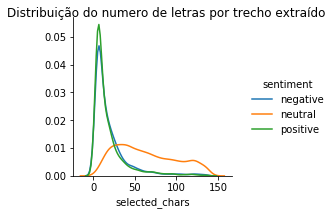

In [15]:
g = sns.FacetGrid(train, hue = "sentiment")
g = g.map(sns.kdeplot, "selected_chars").add_legend()
g.fig.suptitle('Distribuição do numero de letras por trecho extraído')

In [16]:
train.head()


,index,textID,text,selected_text,sentiment,chars,selected_chars
0,0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,35
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,8
2,2,088c60f138,my boss is bullying me...,bullying me,negative,25,11
3,3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,14
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,13


In [17]:
train['word_count'] = train['text'].apply(lambda s: len(set(re.findall(r"\w+", s))))


In [18]:
train.head()



,index,textID,text,selected_text,sentiment,chars,selected_chars,word_count
0,0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,35,7
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,8,10
2,2,088c60f138,my boss is bullying me...,bullying me,negative,25,11,5
3,3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,14,5
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,13,14


Text(0.5, 0.98, 'Distribuição do número de palavras única por tweet')

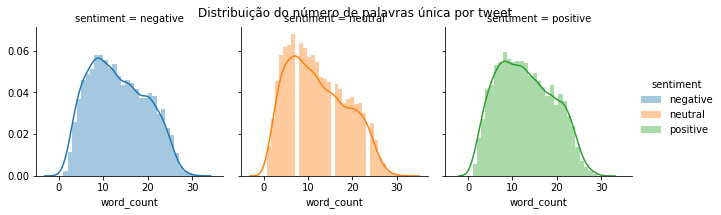

In [19]:
g = sns.FacetGrid(train, hue = 'sentiment', col = 'sentiment')
g = g.map(sns.distplot, 'word_count').add_legend()
g.fig.suptitle('Distribuição do número de palavras única por tweet')


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from nltk.corpus import stopwords


In [21]:
nltk.download('stopwords')

NameError: name 'nltk' is not defined

In [22]:
nltk.corpus.download('stopwords')

NameError: name 'nltk' is not defined

In [23]:
!pip install nltk

In [24]:
stop = set(stopwords.words('english'))

In [25]:
print(stop)

{'about', 'and', 'can', 'isn', 'an', 'm', "hadn't", "haven't", "don't", 'any', 'am', 'few', 'are', 'while', 'yourselves', 'd', 'which', "couldn't", "you've", 'theirs', 't', 'before', 'doesn', 'by', 'his', 'then', 'just', 'ma', "mustn't", 'he', 'had', 'myself', 'under', 'in', 'at', 'when', 'from', 're', 'mightn', 'have', 'will', 'other', 'be', 'but', 'their', 'same', 'we', 'own', 'above', 'most', 'needn', 'out', 'off', 'was', 'its', 'whom', 'do', 'that', 'how', "you're", 'after', "it's", 'against', "she's", 'them', 'didn', 'why', 'shouldn', 'who', 'than', 'did', 'again', 'here', 'now', 'this', 'been', 'o', 'such', 'if', 'until', "needn't", 's', 'what', 'there', 'should', 'hers', 'the', 'once', 'doing', 'ain', 'her', 'on', 'herself', 'both', "isn't", 'some', "didn't", 'him', 'no', "doesn't", "weren't", 'for', 'me', 'were', 've', 'you', 'where', 'couldn', 'itself', "aren't", 'nor', 'won', 'a', 'down', "wasn't", 'don', "that'll", 'over', 'mustn', 'it', 'hasn', 'up', 'to', 'more', 'yourself

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

In [28]:
stop = set(stopwords.words('english'))
plt.style.use('seaborn')

In [29]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

        return new_corpus

In [30]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

        return new_corpus


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter

In [33]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)
for in in range(3):
    df = train[train.sentiment == sents[i]]
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpous_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sent[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')

SyntaxError: invalid syntax (<ipython-input-33-906b9c98697f>, line 4)

In [34]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)
for i in range(3):
    df = train[train.sentiment == sents[i]]
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpous_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sent[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


BadZipFile: File is not a zip file

In [36]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)
for i in range(3):
    df = train[train.sentiment == sents[i]]
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpous_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sent[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


BadZipFile: File is not a zip file

In [37]:
nltk.download('wordnet')

NameError: name 'nltk' is not defined

In [38]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [39]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)
for i in range(3):
    df = train[train.sentiment == sents[i]]
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpous_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sent[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


NameError: name 'corpous_train' is not defined

In [40]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)
for i in range(3):
    df = train[train.sentiment == sents[i]]
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sent[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


TypeError: unhashable type: 'list'

In [41]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)
for i in range(3):
    df = train[train.sentiment == sents[i]]
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train.values())
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sent[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


AttributeError: 'list' object has no attribute 'values'

In [42]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)
for i in range(3):
    df = train[train.sentiment == sents[i]]
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sent[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


TypeError: unhashable type: 'list'

In [43]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)
for i in range(3):
    df = train[train.sentiment == sents[i]]
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sent[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


TypeError: unhashable type: 'list'

In [45]:

print(preprocess(train[train.sentiments == 'neutral'], n=3))


AttributeError: 'DataFrame' object has no attribute 'sentiments'

In [46]:

print(preprocess(train[train.sentiment == 'neutral'], n=3))


[['responded', 'going']]


In [47]:

print(preprocess(train[train.sentiment == 'negative'], n=3))


[['Sooo', 'miss', 'Diego']]


In [48]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpos for word in l]

    return new_corpus

In [49]:

print(preprocess(train[train.sentiment == 'negative'], n=3))


NameError: name 'new_corpos' is not defined

In [52]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpos for word in l]

    return new_corpus

In [53]:

print(preprocess(train[train.sentiment == 'negative'], n=3))


NameError: name 'new_corpos' is not defined

In [54]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus

In [55]:

print(preprocess(train[train.sentiment == 'negative'], n=3))


, 'Disney', 'trained', 'Soarin', 'Rose', 'applied', 'apartment', 'last', 'night', 'Eric', 'lost', 'useless', 'tweet', 'coming', 'long', 'gnna', 'phils', 'Just', 'T_____T', 'Gyah', 'baby-client', 'teething', 'miserable', 'forgot', 'pack', 'lunch', 'migranes..', 'leaf', 'either', 'arthritis', 'and/or', 'gout', 'upset', 'fact', '2010', 'last', 'year', 'oasis', 'ribena', 'toughest', 'decision', 'everrr', 'sorry', 'Definitely', 'getting', 'weekend', 'back', 'reno', '..Get', 'Over', 'Feel', 'Horrible', 'Must', 'Think', 'That', 'What', 'Meant', 'Just', 'Thought', 'Better', 'Than', 'Brunt', 'plan', 'people', 'cancelled', 'teddy', 'chucking', 'time', 'TIRED', 'goodnight', 'twitter', 'mother', 'happy', 'mother', 'moomy', 'yayy', 'Bless', 'come', 'sick', 'inflamed', 'vocal', 'cord', 'tripping', 'tiredness', 'nottt', 'nice', 'sitting', 'school', 'suck', 'great', 'Tampa', 'people', 'anybody', 'area', 'know', 'someone', 'work', 'Jain', 'Society', 'Tampa', 'None', 'phone', 'work', 'back', 'sunday', '

In [57]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus

In [59]:

print(preprocess(train[train.sentiment == 'negative'], n=3))


, 'Disney', 'trained', 'Soarin', 'Rose', 'applied', 'apartment', 'last', 'night', 'Eric', 'lost', 'useless', 'tweet', 'coming', 'long', 'gnna', 'phils', 'Just', 'T_____T', 'Gyah', 'baby-client', 'teething', 'miserable', 'forgot', 'pack', 'lunch', 'migranes..', 'leaf', 'either', 'arthritis', 'and/or', 'gout', 'upset', 'fact', '2010', 'last', 'year', 'oasis', 'ribena', 'toughest', 'decision', 'everrr', 'sorry', 'Definitely', 'getting', 'weekend', 'back', 'reno', '..Get', 'Over', 'Feel', 'Horrible', 'Must', 'Think', 'That', 'What', 'Meant', 'Just', 'Thought', 'Better', 'Than', 'Brunt', 'plan', 'people', 'cancelled', 'teddy', 'chucking', 'time', 'TIRED', 'goodnight', 'twitter', 'mother', 'happy', 'mother', 'moomy', 'yayy', 'Bless', 'come', 'sick', 'inflamed', 'vocal', 'cord', 'tripping', 'tiredness', 'nottt', 'nice', 'sitting', 'school', 'suck', 'great', 'Tampa', 'people', 'anybody', 'area', 'know', 'someone', 'work', 'Jain', 'Society', 'Tampa', 'None', 'phone', 'work', 'back', 'sunday', '

In [60]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)
for i in range(3):
    df = train[train.sentiment == sents[i]]
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sent[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


NameError: name 'sent' is not defined

Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

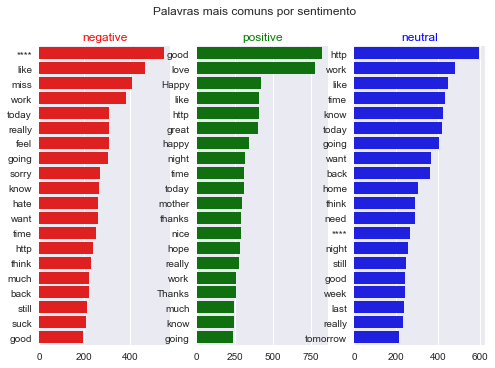

In [61]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)
for i in range(3):
    df = train[train.sentiment == sents[i]]
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

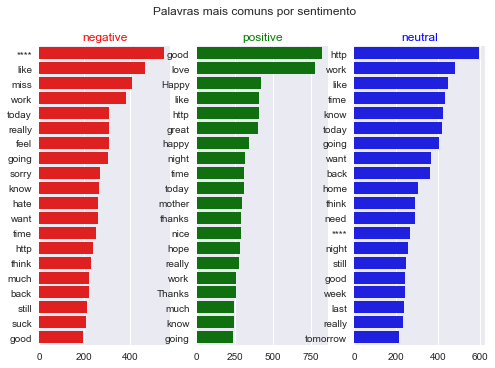

In [62]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)
for i in range(3):
    df = train[train.sentiment == sents[i]]
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


In [64]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus



def limpar_texto(texto):
    texto = texto.lower
    texto = re.sub(r'https?://www.\.\S+\.com', '', texto);
    texto = re.sub(r'^[A-Za-z|\s]', '', texto);
    return texto

def limpar_df(df, cols)
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return 

SyntaxError: invalid syntax (<ipython-input-64-2a6d8727d861>, line 25)

In [65]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)




for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['text'])
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


NameError: name 'limpar_df' is not defined

In [66]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus



def limpar_texto(texto):
    texto = texto.lower
    texto = re.sub(r'https?://www.\.\S+\.com', '', texto);
    texto = re.sub(r'^[A-Za-z|\s]', '', texto);
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

In [67]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)




for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['text'])
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


TypeError: expected string or bytes-like object

In [68]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus



def limpar_texto(texto):
    texto = texto.lower
    texto = re.sub(r'https?://www\.\S+\.com', '', texto);
    texto = re.sub(r'^[A-Za-z|\s]', '', texto);
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

In [69]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)




for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['text'])
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


TypeError: expected string or bytes-like object

In [70]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus



def limpar_texto(texto):
    texto = texto.lower
    texto = re.sub(r'https?://www\.\S+\.com', '', texto, str(location));
    texto = re.sub(r'^[A-Za-z|\s]', '', texto);
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

In [71]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)




for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['text'])
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


NameError: name 'location' is not defined

In [72]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus



def limpar_texto(texto):
    texto = texto.lower
    texto = re.sub(r'https?://www\.\S+\.com', '', str(texto));
    texto = re.sub(r'^[A-Za-z|\s]', '', texto);
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

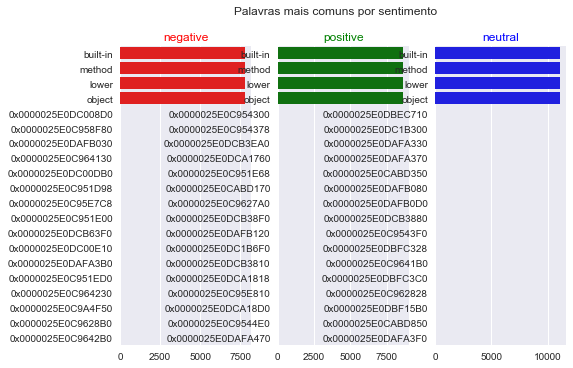

In [73]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)




for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['text'])
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


In [75]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus



def limpar_texto(texto):
    texto = texto.lower
    texto = re.sub(r'https?://www\.\S+\.com', '', str(texto));
    texto = re.sub(r'^[A-Za-z|\s]', '', texto);
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

In [76]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus



def limpar_texto(texto):
    texto = texto.lower
    texto = re.sub(r'https?://www\.\S+\.com', '', str(texto));
    texto = re.sub(r'^[A-Za-z|\s]', '', texto);
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

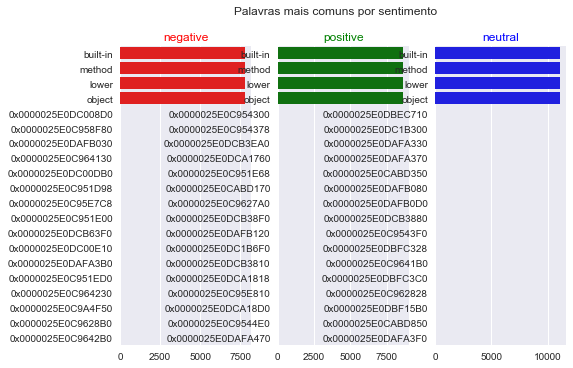

In [79]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)




for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['text'])
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


In [80]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus



def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'https?://www\.\S+\.com', '', str(texto));
    texto = re.sub(r'^[A-Za-z|\s]', '', str(texto));
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

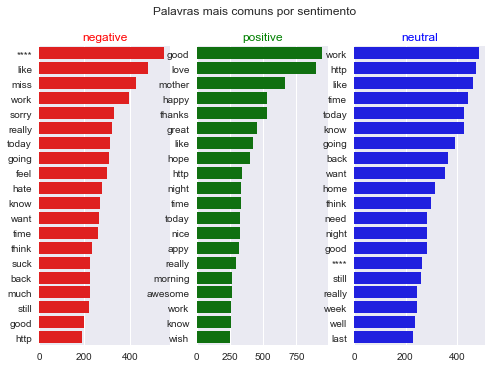

In [81]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)




for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['text'])
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


In [82]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus



def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'https?://www\.\S+\.com', '', str(texto));
    texto = re.sub(r'^[A-Za-z|\s]', '', str(texto));
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

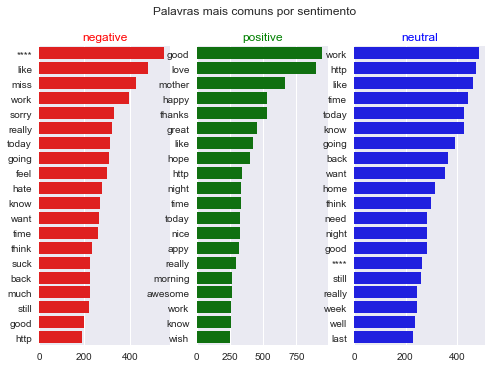

In [85]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)




for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['text'])
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


In [86]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus



def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'https?://www\.\S+\.com', '', texto));
    texto = re.sub(r'^[A-Za-z|\s]', '', texto));
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

SyntaxError: invalid syntax (<ipython-input-86-f906171159c1>, line 21)

Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

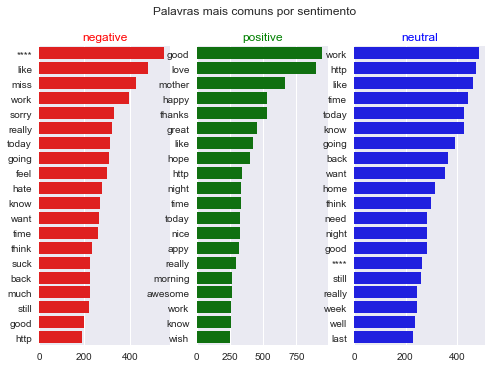

In [87]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)




for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['text'])
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


In [88]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus



def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'https?://www\.\S+\.com', '', texto))
    texto = re.sub(r'^[A-Za-z|\s]', '', texto))
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

SyntaxError: invalid syntax (<ipython-input-88-884a2a31477d>, line 21)

In [89]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus



def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'https?://www\.\S+\.com', '', texto)
    texto = re.sub(r'^[A-Za-z|\s]', '', texto)
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

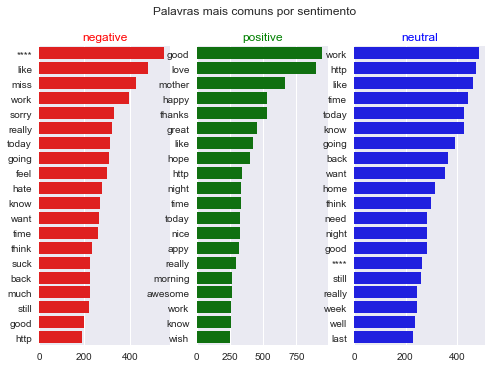

In [90]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)




for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['text'])
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

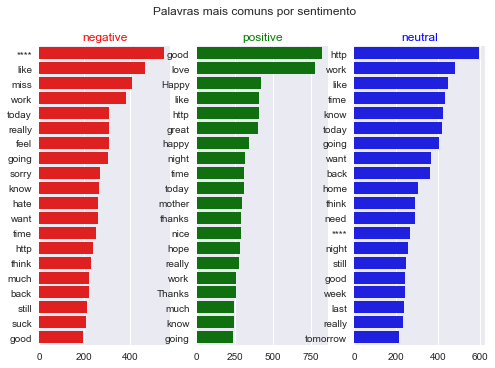

In [91]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)




for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['selected_text'])
    corpus_train = preprocess(df, n=3)
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

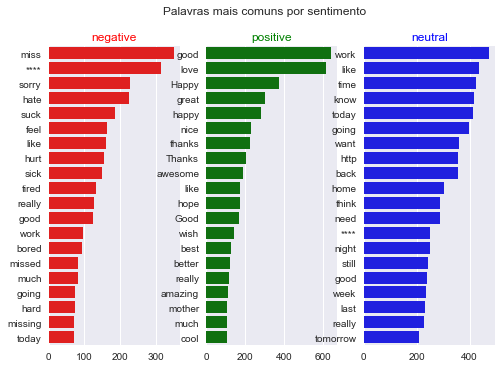

In [92]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)




for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['text'])
    corpus_train = preprocess(df, n=3, col = 'selected_text')
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


In [93]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus

def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'https?://www\.\S+\.com', '', texto)
    texto = re.sub(r'^[A-Za-z|\s]', '', texto)
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

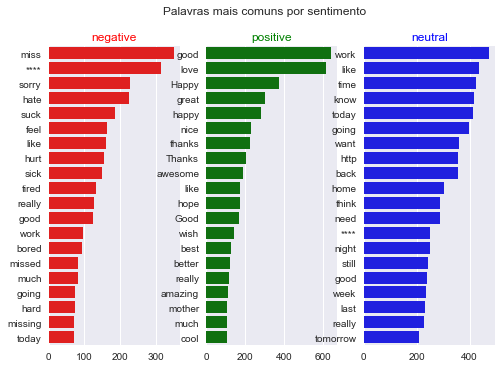

In [96]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)

for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['text'])
    corpus_train = preprocess(df, n=3, col = 'selected_text')
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

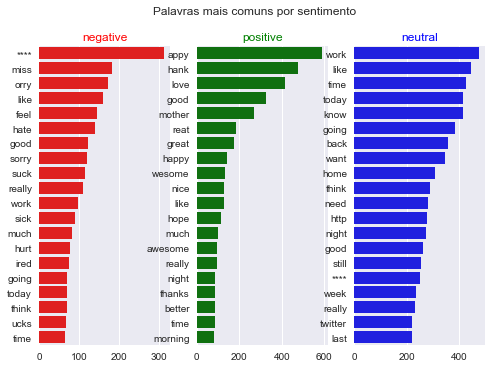

In [97]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)

for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['selected_text'])
    corpus_train = preprocess(df, n=3, col = 'selected_text')
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


In [98]:
def preprocess(df, stop = stop, n=1, col='text'):

    new_corpus=[]
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df[col]:
        words = [w for w in word_tokenize(text) if (w not in stop)]

        words = [lem.lemmatize(w) for w in words if (len(w)>n)]

        new_corpus.append(words)

    new_corpus = [word for l in new_corpus for word in l]

    return new_corpus

def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'https?://www\.\S+\.com', '', texto)
    texto = re.sub(r'^[A-Za-z|\s]', '', texto)
    return texto

def limpar_df(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: limpar_texto(x))
    return df

Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

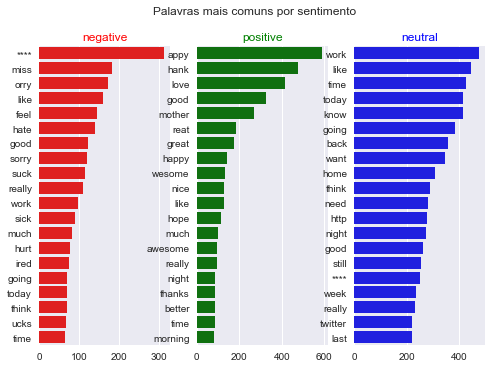

In [100]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)

for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['selected_text'])
    corpus_train = preprocess(df, n=3, col = 'selected_text')
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

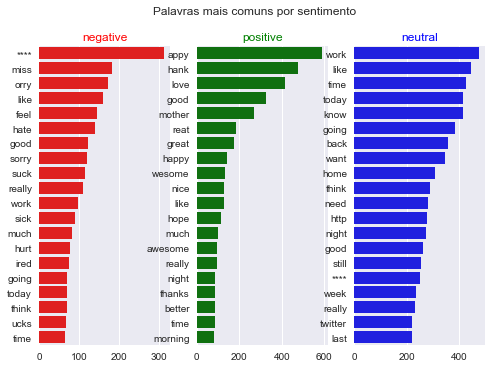

In [103]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)

for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['selected_text'])
    corpus_train = preprocess(df, n=3, col = 'selected_text')
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')


Text(0.5, 0.98, 'Palavras mais comuns por sentimento')

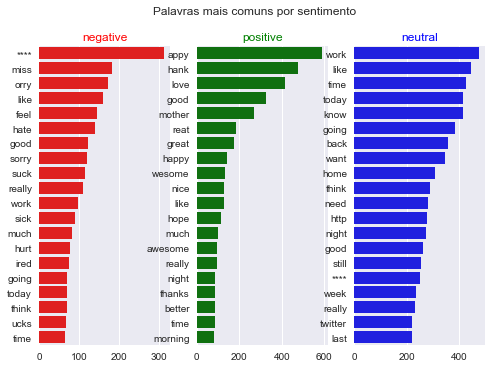

In [106]:
sents = ['negative', 'positive', 'neutral']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3)

for i in range(3):
    df = limpar_df(train[train.sentiment == sents[i]], ['selected_text'])
    corpus_train = preprocess(df, n=3, col = 'selected_text')
    counter = Counter(corpus_train)
    most = counter.most_common()
    x = []
    y = []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, ax=ax[i], color = colors[i])
    ax[i].set_title(sents[i], color = colors[i])
fig.suptitle('Palavras mais comuns por sentimento')
